# Page Rank

Der Page Rank Algorithmus wird genutzt, um zu bestimmen wie wichtig eine Seite im Internet ist und fließt mit ein, wenn Google entscheidet was als Ergebnis deiner Suche auf Seite 1 oder auf Seite 4 vorgeschlagen wird.

Für kleine Netzwerke kann man unter einer Nebenbedingungen (z.B. die Summer aller Ränge bzw. Wichtigkeiten muss 1 ergeben) die exakte Lösung bestimmen. Für größere Netzwerke ist das nichtmehr möglich. Dann wird dieser Wert näherungsweise schrittweise (iterativ) berechnet. Den Algorithmus nennt man **Random Walk**. 

In diesem Notebook kannst du den Random Walk Algorithmus selbst implementieren und die Genauigkeit mit der exakten Lösung vergleichen, da wir ein sehr kleines Netzwerk als Beispiel nehmen.

In [1]:
# Zuerst importieren wir alle nötigen Pakete
import numpy as np

## 1. Vorbereitung Netzwerk

Wir betrachten ein Netzwerk mit 10 Seiten, die wiefolgt aufeinander zeigen:
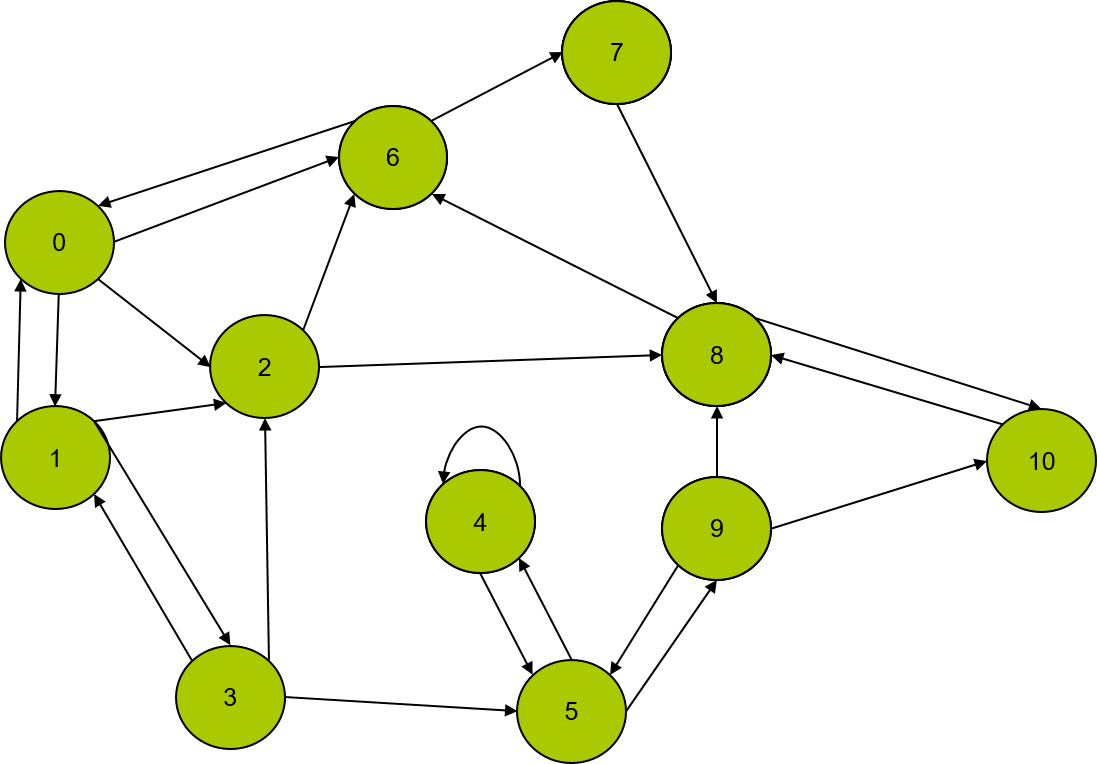

### Ausflug: Matrizen

Da ihr Matrizen wahrscheinlich noch nicht kennt, wir diese nun aber brauchen, um den Algorithmus effizient zu implementieren, hier eine kleine Erklärung dazu.

Matrizen kann man sich vorstellen wie gestapelte Vektoren z.B. haben wir drei Vektoren

$$v_a = [0, 1] \; v_b = [1, 0] \; v_c = [1, 2]  $$

Eine Matrix aus den beiden Vektoren ist dann z.B.

$$M = \begin{pmatrix} v_a \\ v_b \\ v_c \end{pmatrix} = \begin{pmatrix} 0 &1 \\ 1& 0 \\ 1 &2 \end{pmatrix} $$

Die Matrixenmultiplikation zwischen einer Matrix und einem Vektor ist die Anwendung des Skalarprodukts zwischen den Reihen der Matrix und dem Spaltenvektor. Daher muss die Länge der Reihen der Matrix und die Länge des damit multiplizierten Vektors gleich sein. Wenn wir unsere Matrix M mit dem Vektor $b = [1, 1]$ multiplizieren heißt das Folgendes:

$$ c = M * b = \begin{pmatrix} 0 &1 \\ 1& 0 \\ 1 &2 \end{pmatrix} * \begin{pmatrix} 1 \\ 1 \end{pmatrix} =
\begin{pmatrix} 0*1+ 1*1 \\ 1*1+0*1 \\ 1*1+1*2 \end{pmatrix} = \begin{pmatrix} 1 \\ 1 \\ 3 \end{pmatrix} = c$$

In Python impementiert man Matrizen und Vektoren mit dem numpy Paket. Unser Beispiel würde so aussehen:

In [2]:
M = np.array([[0,1],[1,0],[1,2]])
b = np.array([1, 1])

c = np.dot(M,b)
print('Das Ergebnis sollte [1 1 3] sein. Ist das auch so? Das Ergebnis ist:')
print(c)

Das Ergebnis sollte [1 1 3] sein. Ist das auch so? Das Ergebnis ist:
[1 1 3]


### Erstellen einer Matrix die angibt, auf welche Seiten eine bestimmte Seite zeigt (Nachbarschaftsmatrix)

Wir wollen eine Matrix erstellen, wo die Zeile die betrachtete Seite ist und die Spalten die Seiten die auf diese Seite zeigen. Dabei soll in der Zeile 0 stehen wenn die Seite (Spaltennummer) nicht auf die Seite (Zeilenummer) zeigt und 1 wenn die andere Seite auf die betrachtete Zeile zeigt.

Wenn wir uns zum Beispiel Seite 0 anschauen, wäre die Zeile dazu

$$\begin{matrix} \text{Nummer der anderen Seite}&0 &1 &2 &3 &4 &5 &6 &7 &8 &9 &10 \\ \text{Zeile für Seite 0}&(0 &1 &0 &0 &0 &0 &1 &0 &0 &0 &0)\end{matrix}$$

**Aufgabe** Erstelle eine Matrix die angibt, welche Seiten auf eine bestimmte Seiten zeigen für unser Netzwerk. Nenne die Nachbarschaftsmatrix A.

In [3]:
# Tipp: Dein Code sollte so anfangen: A=....
# Tipp: Nutze np.array um die Matrize zu erstellen
# DEIN CODE:

In [4]:
# Teste ob die Form deiner Matrix stimmt:
if A.shape == (11, 11):
    print('Deien Matrix hat die richtige Form')
else:
    print('Deine Matrix hat die Form {}, richtig wäre (11,11)'.format(A.shape))

Deien Matrix hat die richtige Form


## 2. Implementierung Random Walk

Nun haben wir alles was wir brauchen, um den Random Walk Algorithmus zu Implementieren. Hier nochmal der Pseudocode:

1. Teile jede Spalte von der Nachbarschaftsmatrix A durch die Anzahl der Einträge  
2. Initialisiere den Page Rank Vektor r zufällig
3. Initialisiere die maximale Schrittanzahl N (z.B. mit 1000) und die aktuelle Schrittanzahl i
4. **Solange** die aktuelle Schrittanzahl i < der maximalen Schrittanzahl N
    1. Multipliziere die Matrix mit dem Page Rank Vektor, um den neuen Page Rank Vektor zu erhalten
    2. Erhöhe die Schrittanzahl um 1
    3. **Wenn** der Unterschied zwischen dem vorherigen Page Rank Vektor und dem neuen < maximaler Fehler
        **Dann**, gebe r zurück
5. Gebe r zurück

**Aufgabe** Versuche den Pseudocode in einer Funktion *random_walk* zu implementieren.

In [5]:
def random_walk(A, eps=1e-4):
    """
    Implementiert den Random Walk Algorithmus.
    
    Parameters
    ----------
    A           : np.array,
                  Matrix die angibt auf welche anderen Seiten eine bestimmte Seite zeigt
    eps         : float, 
                  maximal zulässiger Fehler, dieses Argument kann spezifiziert werden, falls das nicht der Fall ist
                  wird der "Default" Wert 0.0001 angenommen
    
    Returns
    -------
    r          : np.array,
                 Page rank Vektor, der den Rang/ die Wichigkeit für jede Seite enthält
    """
    
    #### Dein CODE ####

Teste deine Funktion und lasse dir deinen Rangvektor ausgeben. Welche ist die wichtigste Seite und welche ist die unwichtigste Seite?

In [6]:
r = random_walk(A)
print('Dein errechneter Page Rank Vektor ist:')
print(r / np.sum(r))
print('Der wahre wichtigste Seite ist 8, deine wichtigste Seite ist {}'.format(np.argmax(r)))
print('Der wahre unwichtigste Seite ist 9, deine wichtigste Seite ist {}'.format(np.argmin(r)))

Dein errechneter Page Rank Vektor ist:
[0.1182143  0.04432936 0.05910551 0.01477615 0.01481199 0.01480253
 0.20687915 0.10343815 0.27584816 0.00740324 0.14039146]
Der wahre wichtigste Seite ist 8, deine wichtigste Seite ist 8
Der wahre unwichtigste Seite ist 9, deine wichtigste Seite ist 9


### Tipps
Du kommst nicht weiter - hier sind noch ein paar Tipps zum Pseudocode:    

1. Teile jede Spalte von der Nachbarschaftsmatrix A durch die Anzahl der Einträge
    - Tipp: Bilde die Summe über eine Spalte - so erhälst du einen Vektor - Schau dir dazu die Funktion np.sum(,axis) an
    - Tipp: Wenn du eine Matrix durch einen Vektor teilst ( M / b ), wird jedes Element einer Spalte durch den jeweiliegn Wert des Vekotors geteilt
    
    
2. Initialisiere den Page Rank Vektor r zufällig
    - Tipp: Schaue dir die Funktion np.random.rand() an
    - Tipp: Die Länge des Vektors muss der Anzahl der Seiten enstprechen
    
    
3. Initialisiere die maximale Schrittanzahl N (z.B. mit 1000) und die aktuelle Schrittanzahl i
    - Tipp: i muss ein int sein. Bisher sind wir noch keine Schritte gegangen


4. **Solange** die aktuelle Schrittanzahl i < der maximalen Schrittanzahl N
    - Tipp: Solange ist ein Stichwort für eine Schleife - In Python kann man Schleifen mit while oder for definieren
    
Multipliziere die Matrix mit dem Page Rank Vektor um den neuen Page Rank Vektor zu erhalten
    - Tipp: Schaue dir die Multiplikation bei *Ausflug: Matrizen* an

Erhöhe die Schrittanzahl um 1
    - Tipp: i muss eins größer werden
        
        
**Wenn** der Unterschied zwischen dem vorherigen Page Rank Vektor und dem neuen < maximaler Fehler, **Dann**, gebe r zurück
    - Tipp: Nehme für den Unterschied den Betrag der Differenz der beiden Vektoren und summiere alle Einträge
    - Tipp: Wenn & dann sind die Stichwörter für Bedingungen in Python
    - Tipp: gebe zurück ist das Stichwort für den Output
        
5. Gebe r zurück

## 3. Exakte Lösung und Vergleich

Da unser Beispielnetz sehr klein ist, kann man auch die exakte Lösung berechnen. Mathematisch ist der Page Rank Vektor ein Eigenvektor der Matrix A. Da ihr sowas frühstens im 2. Bachelorsemester verstehen / lernen müsst / dürft, stellen wir das Thema nicht im Detail vor. Dafür aber hier die magische Funktion, die das Problem exakt löst. Wenn du Lust hast, kannst du versuchen die einzelnen Codezeilen zu verstehen. Wenn du die Funktion nicht kennst, dann schau mal auf der Dokumentationsseite des NumPy Pakets: https://numpy.org/doc/stable/reference/index.html

In [7]:
def solve_page_rank_exact(A):
    """
    Implementiert die exakte Lösung des Gleichungssytems des Page Rank Algorithmus mit der Nebenbedingung, dass
    die Summe aller Ränge/Wichtigkeiten gleich 1 ist.
    
    Parameters
    ----------
    A           : np.array,
                  Matrix die angibt auf welche anderen Seiten eine bestimmte Seite zeigt
    
    Returns
    -------
    r          : np.array,
                 Page rank Vektor, der den Rang/ die Wichigkeit für jede Seite enthält
    """

    A = A / A.sum(0) - np.eye(A.shape[0])
    A_with_constraint = np.vstack([A, np.ones(A.shape[0])])
    b = np.zeros(A.shape[0])
    b= np.append(b, [1])

    r = np.linalg.lstsq(A_with_constraint,b)
    return r[0]

Nun kannst du überprüfen wie gut der Random Walk Algorithmus, den Page Rank Vektor approximiert. Führe dazu die nächste Zelle aus. Was stellst du fest?

In [8]:
r_exact = solve_page_rank_exact(A)

print('Der exakte Page Rank Vektor ist')
print(r_exact)
print('Die Differenz zwischen dem Random Walk Vektor und dem exakten ist')
print(np.abs((r/ np.sum(r))-r_exact))

Der exakte Page Rank Vektor ist
[0.1182266  0.04433498 0.0591133  0.01477833 0.01477833 0.01477833
 0.20689655 0.10344828 0.27586207 0.00738916 0.14039409]
Die Differenz zwischen dem Random Walk Vektor und dem exakten ist
[1.22999447e-05 5.61515439e-06 7.79297400e-06 2.17781960e-06
 3.36686069e-05 2.42040854e-05 1.73988378e-05 1.01221251e-05
 1.39137825e-05 1.40812153e-05 2.63326966e-06]


/home/hanna/anaconda3/envs/commonroad-ship/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Super, du hast den Random Walk Algorithmus implementiert! Jetzt wo du ihn genauer kennst, was könnten Probleme sein? Wann würde er keine gute Lösung finden?

Wenn du eine Idee hast, kannst du diese auch mit deiner Implementierung ausprobieren, indem du unser Beispielnetz (A Matrix) entsprechend deiner Annahme veränderst. 